In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
processing_time = pd.read_csv("cases_time/processing_time.csv")
selection = pd.read_csv("cases_time/Selection Sort.csv")
bubble = pd.read_csv("cases_time/Bubble Sort.csv")
pancake = pd.read_csv("cases_time/Pancake Sort.csv")
shell = pd.read_csv("cases_time/Shell Sort.csv")

In [3]:
processing_time.head()

,Algoritmos,1000,10000,20000,50000,75000,100000
0,Selection Sort,0.030110,2.904933,11.499453,71.789410,166.308239,286.279141
1,Bubble Sort,0.070929,7.073555,28.439240,177.526233,418.471808,747.514300
2,Pancake Sort,0.017544,2.040081,8.692845,55.428651,126.079368,225.266122
3,Shell Sort,0.002688,0.041353,0.103753,0.409596,0.804779,1.272535


In [4]:
processing_time = processing_time.set_index('Algoritmos')

In [5]:
processing_time.head()

,1000,10000,20000,50000,75000,100000
Algoritmos,,,,,,
Selection Sort,0.030110,2.904933,11.499453,71.789410,166.308239,286.279141
Bubble Sort,0.070929,7.073555,28.439240,177.526233,418.471808,747.514300
Pancake Sort,0.017544,2.040081,8.692845,55.428651,126.079368,225.266122
Shell Sort,0.002688,0.041353,0.103753,0.409596,0.804779,1.272535


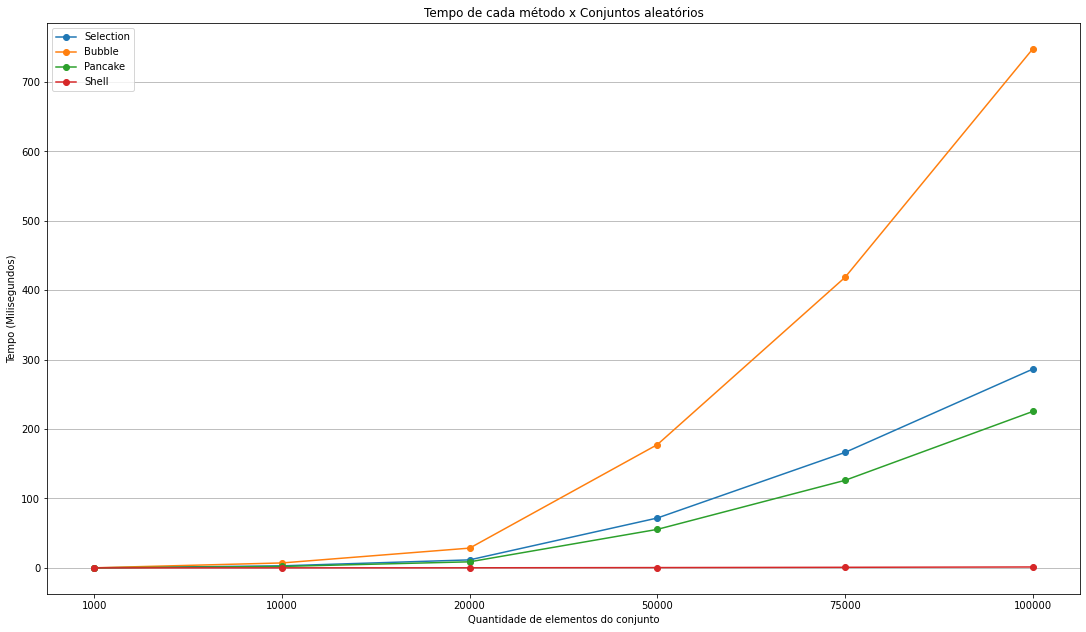

In [6]:
inputs = list(processing_time.columns)
selection_process_time = list(processing_time.iloc[[0][0]])
bubble_process_time = list(processing_time.iloc[[1][0]])
pancake_process_time = list(processing_time.iloc[[2][0]])
shell_process_time = list(processing_time.iloc[[3][0]])

fig, ax = plt.subplots()
ax.plot(inputs, selection_process_time, "-o", label = "Selection") 
ax.plot(inputs, bubble_process_time, "-o", label = "Bubble")
ax.plot(inputs, pancake_process_time, "-o", label = "Pancake")
ax.plot(inputs, shell_process_time, "-o", label = "Shell")
ax.set_xlabel('Quantidade de elementos do conjunto') 
ax.set_ylabel('Tempo (Milisegundos)') 
ax.set_title('Tempo de cada método x Conjuntos aleatórios') 
ax.yaxis.grid(True)
fig.set_size_inches(18.5, 10.5)
ax.legend()

# Selection Sort

In [7]:
def selection_sort(collection: int) -> list:
    length = len(collection)
    for i in range(length - 1):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        if least != i:
            collection[least], collection[i] = (collection[i], collection[least])
    return collection


### Como funciona ?

![](imgs/selection-sort.gif)

O algoritmo divide a lista de entrada em duas partes: uma sublista classificada de itens que é construída da esquerda para a direita na frente (esquerda) da lista e uma sublista dos itens não classificados restantes que ocupam o resto da lista. Inicialmente, a sublista classificada está vazia e a sublista não classificada é a lista de entrada inteira. O algoritmo prossegue encontrando o menor (ou maior, dependendo da ordem de classificação) elemento na sublista não classificada, trocando (trocando) com o elemento não classificado mais à esquerda (colocando-o em ordem de classificação) e movendo os limites da sublista um elemento para a direita.

**Melhor Caso:**

Melhor caso ocorre quando a lista está ordenada -> O(nˆ2)

**Caso Médio:**

Caso médio ocorre quando a lista está misturada com elementos ordenados e não ordenados -> O(n^2) 

**Pior Caso:**

Pior caso ocorre quando a lista está inversamente ordenada -> O(nˆ2)

**Complexidade espacial:**
O(1)

In [8]:
inputs = list(selection["Values"])
# selection = selection.set_index('Values')
selection.head()

,Values,Best Case,Worst Case,Average Case
0,1000,0.030543,0.032299,0.121862
1,10000,2.876779,2.983574,11.376653
2,20000,11.257652,11.761951,45.108199
3,50000,70.183132,235.852940,300.680801
4,75000,168.691214,175.394038,677.857470


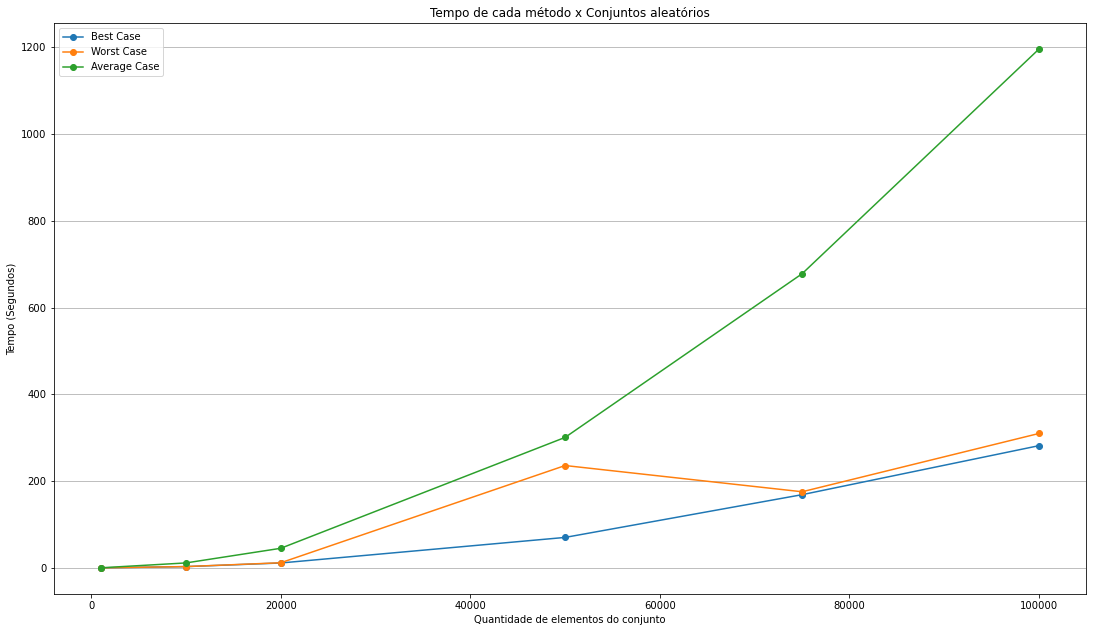

In [9]:
best_cases = list(selection["Best Case"])
worst_cases = list(selection["Worst Case"])
average_cases = list(selection["Average Case"])

fig, ax = plt.subplots()
ax.plot(inputs, best_cases, "-o", label = "Best Case") 
ax.plot(inputs, worst_cases, "-o", label = "Worst Case")
ax.plot(inputs, average_cases, "-o", label = "Average Case")
ax.set_xlabel('Quantidade de elementos do conjunto') 
ax.set_ylabel('Tempo (Segundos)') 
ax.set_title('Tempo de cada método x Conjuntos aleatórios') 
ax.yaxis.grid(True)
fig.set_size_inches(18.5, 10.5)
ax.legend()

# Bubble Sort

In [10]:
def bubble_sort(collection: int) -> list:
    length = len(collection)
    for i in range(length - 1):
        swapped = False
        for j in range(length - 1 - i):
            # Compara os elementos adjacentes, e os troca caso estejam na ordem errada.
            if collection[j] > collection[j + 1]:
                swapped = True
                collection[j], collection[j + 1] = collection[j + 1], collection[j]
        if not swapped:
            break  # Para se a lista estiver ordenada.
    return collection

### Como funciona ?

![](imgs/bubble-sort.gif)

Bubble sort é um algoritmo de classificação simples que percorre repetidamente a lista, compara elementos adjacentes e os troca se estiverem na ordem errada. A passagem pela lista é repetida até que a lista seja ordenada.

**Melhor Caso:**

Melhor caso ocorre quando a lista está ordenada -> O(n)

**Caso Médio:**

Caso médio ocorre quando a lista está misturada com elementos ordenados e não ordenados -> O(n^2) 

**Pior Caso:**

Pior caso ocorre quando a lista está inversamente ordenada -> O(nˆ2)

**Complexidade espacial:**
O(1)

**Curiosidade:** O ex-CEO do Google Eric Schmidt perguntou ao então candidato presidencial Barack Obama uma vez durante uma entrevista sobre a melhor maneira de classificar um milhão de inteiros - e Obama, parando por um momento, respondeu: "I think the bubble sort would be the wrong way to go."

In [11]:
inputs = list(bubble["Values"])
# selection = selection.set_index('Values')
bubble.head()

,Values,Best Case,Worst Case,Average Case
0,1000,0.001886,0.098490,0.281209
1,10000,0.001003,10.302183,28.270974
2,20000,0.001844,40.346435,112.994901
3,50000,0.004474,362.720784,757.997886
4,75000,0.007311,607.622079,1712.591744


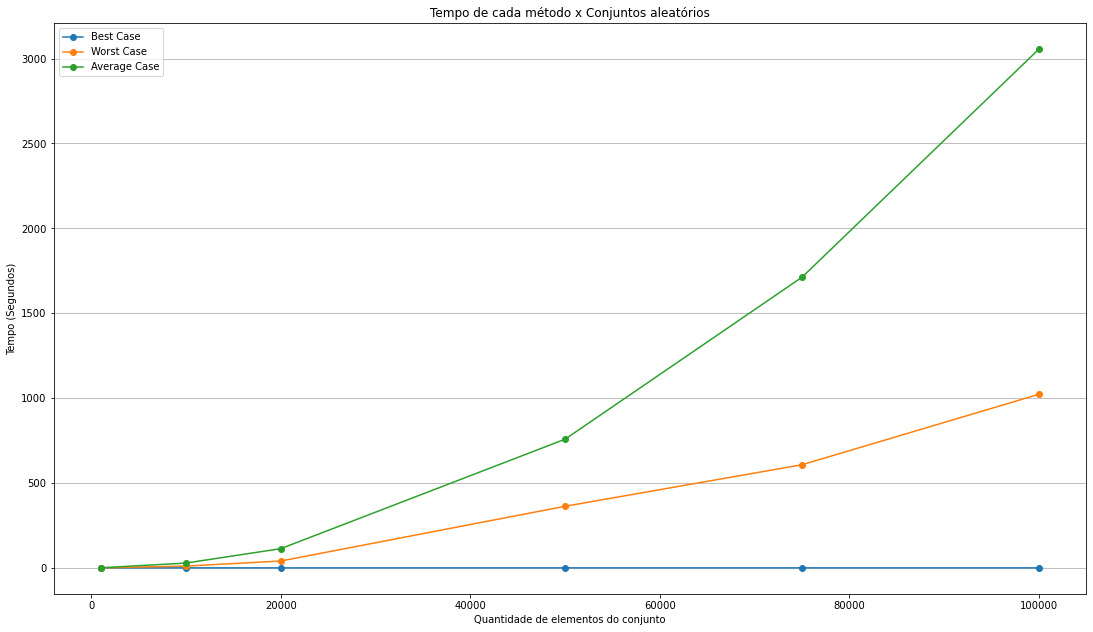

In [12]:
best_cases = list(bubble["Best Case"])
worst_cases = list(bubble["Worst Case"])
average_cases = list(bubble["Average Case"])

fig, ax = plt.subplots()
ax.plot(inputs, best_cases, "-o", label = "Best Case") 
ax.plot(inputs, worst_cases, "-o", label = "Worst Case")
ax.plot(inputs, average_cases, "-o", label = "Average Case")
ax.set_xlabel('Quantidade de elementos do conjunto') 
ax.set_ylabel('Tempo (Segundos)') 
ax.set_title('Tempo de cada método x Conjuntos aleatórios') 
ax.yaxis.grid(True)
fig.set_size_inches(18.5, 10.5)
ax.legend()

# Pancake Sort

In [13]:
def pancake_sort(arr: int) -> list:
    cur = len(arr)
    while cur > 1:
        # Encontra o maior valor dentro no array
        mi = arr.index(max(arr[0:cur]))
        # Inverte de 0 até mi, colocando m1 na primeira posição
        arr = arr[mi::-1] + arr[mi + 1 : len(arr)]
        # Inverte a lista toda
        arr = arr[cur - 1 :: -1] + arr[cur : len(arr)]
        cur -= 1
    return arr

### Como funciona ?

![](imgs/pancake-sort.png)

Pancake Sort é o termo coloquial para o problema matemático de classificar uma pilha desordenada de panquecas em ordem de tamanho, quando uma espátula pode ser inserida em qualquer ponto da pilha e usada para virar todas as panquecas acima dela. Um número de panqueca é o número mínimo de viradas necessárias para um determinado número de panquecas.

**Complexidade Temporal:**

O(nˆ2)

**Complexidade espacial:**

O(log(n))

In [14]:
inputs = list(pancake["Values"])
# selection = selection.set_index('Values')
pancake.head()

,Values,Best Case,Worst Case,Average Case
0,1000,0.022767,0.021013,0.064951
1,10000,2.163986,2.188379,7.168494
2,20000,8.508414,8.499115,28.710797
3,50000,90.795505,57.178424,198.597381
4,75000,129.013985,129.106891,463.127004


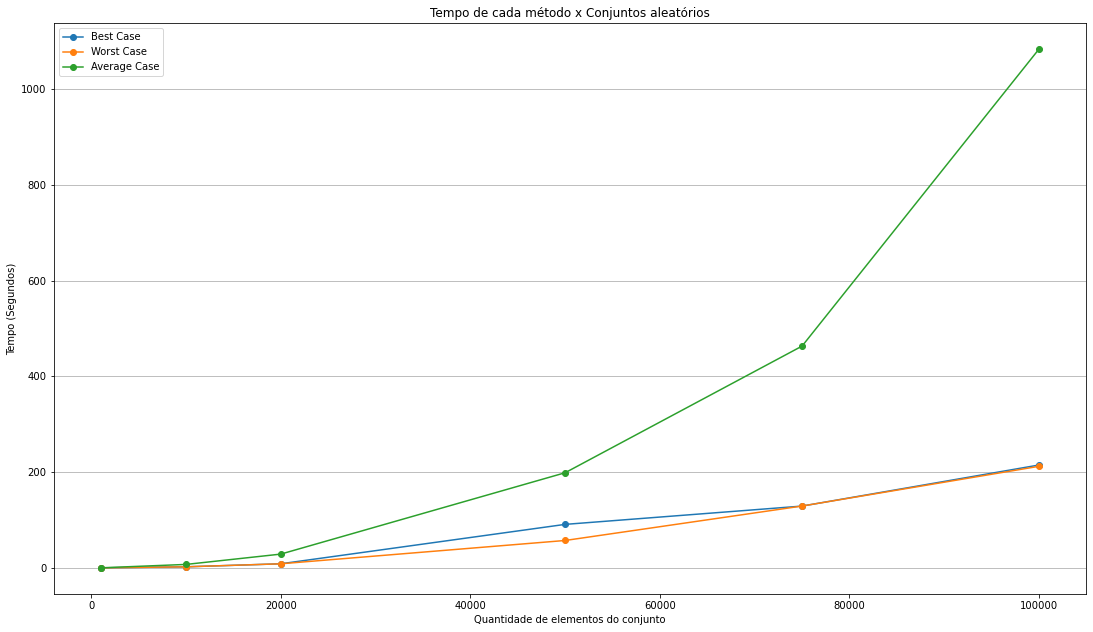

In [15]:
best_cases = list(pancake["Best Case"])
worst_cases = list(pancake["Worst Case"])
average_cases = list(pancake["Average Case"])

fig, ax = plt.subplots()
ax.plot(inputs, best_cases, "-o", label = "Best Case") 
ax.plot(inputs, worst_cases, "-o", label = "Worst Case")
ax.plot(inputs, average_cases, "-o", label = "Average Case")
ax.set_xlabel('Quantidade de elementos do conjunto') 
ax.set_ylabel('Tempo (Segundos)') 
ax.set_title('Tempo de cada método x Conjuntos aleatórios') 
ax.yaxis.grid(True)
fig.set_size_inches(18.5, 10.5)
ax.legend()

# Shell Sort

In [16]:
def shell_sort(collection):
    # Marcin Ciura's gap sequence
    gaps = [701, 301, 132, 57, 23, 10, 4, 1]

    for gap in gaps:
        for i in range(gap, len(collection)):
            j = i
            while j >= gap and collection[j] < collection[j - gap]:
                collection[j], collection[j - gap] = collection[j - gap], collection[j]
                j -= gap
    return collection

### Como funciona ?

![](imgs/shell-sort.gif)

O método começa classificando pares de elementos distantes um do outro e, em seguida, reduzindo progressivamente a lacuna entre os elementos a serem comparados. Começando com elementos distantes, ele pode mover alguns elementos fora do lugar para a posição mais rapidamente do que uma simples troca de vizinho mais próximo.

![Shell Sort Gaps](imgs/shell-sort-gaps.png)

**Complexidade Temporal:**
O(nˆ2)

**Complexidade espacial:**
O(1)

In [17]:
inputs = list(shell["Values"])
# shell = shell.set_index('Values')
shell.head(6)

,Values,Best Case,Worst Case,Average Case
0,1000,0.000668,0.001512,0.003822
1,10000,0.007727,0.030329,0.069466
2,20000,0.016212,0.097669,0.208446
3,50000,0.042027,0.509295,1.121068
4,75000,0.066777,1.097140,2.125831
5,100000,0.085763,1.772762,3.965485


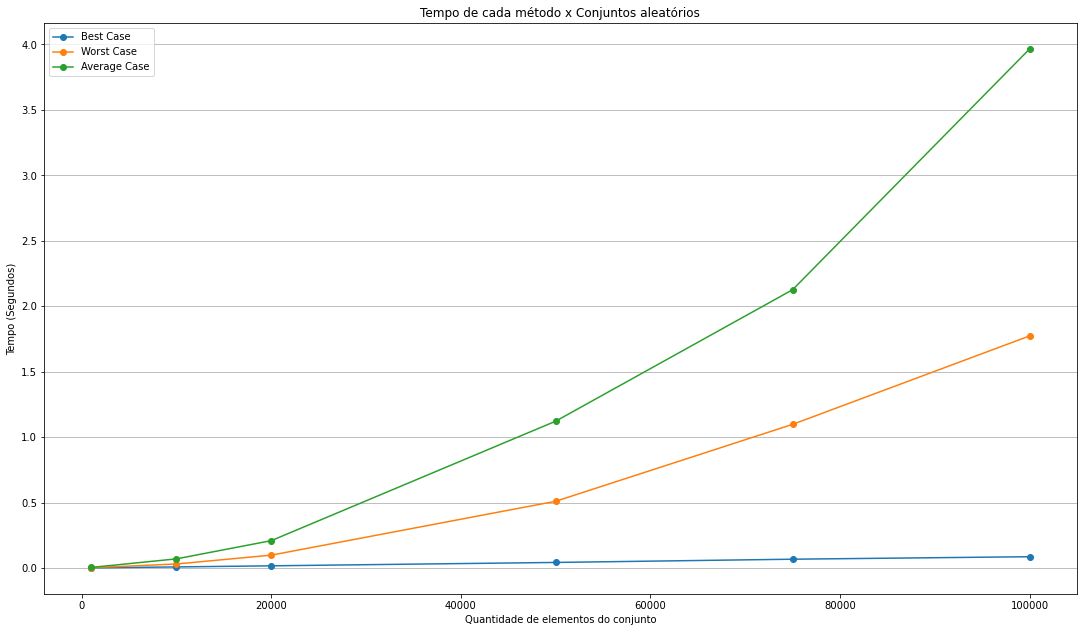

In [18]:
best_cases = list(shell["Best Case"])
worst_cases = list(shell["Worst Case"])
average_cases = list(shell["Average Case"])

fig, ax = plt.subplots()
ax.plot(inputs, best_cases, "-o", label = "Best Case") 
ax.plot(inputs, worst_cases, "-o", label = "Worst Case")
ax.plot(inputs, average_cases, "-o", label = "Average Case")
ax.set_xlabel('Quantidade de elementos do conjunto') 
ax.set_ylabel('Tempo (Segundos)') 
ax.set_title('Tempo de cada método x Conjuntos aleatórios') 
ax.yaxis.grid(True)
fig.set_size_inches(18.5, 10.5)
ax.legend()